### Import Libraries


In [2]:
import numpy as np

# Import pandas
import pandas as pd

# Core scverse libraries
import scanpy as sc
import anndata as ad

# Gerard's libraries
from src.uniprot_client import UniprotClient

# Data retrieval
import pooch

# import seaborn
import seaborn as sns

import matplotlib.pyplot as plt


/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


___
### Config

In [40]:
TRANSLATE_PROTEIN_ID = False

---
### Load the Data

In [41]:
# Load count table
data_src = "./data/raw/sasha_SI_THP/SI_THP_RAW_proteomics_data_ss.xlsx"

# Load the data
dataM1 = pd.read_excel(data_src, sheet_name="THP_M1", index_col=0) # Index = Accession
dataM2 = pd.read_excel(data_src, sheet_name="THP_M2", index_col=0) # Index = Accession

/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Matrix format

* **Accession:** This is a unique identifier assigned to a protein, often from databases like UniProt or RefSeq.
* **Description:** A brief description of the protein's function or characteristics.
* **Score:** A numerical value representing the confidence level of the protein identification. Higher scores generally indicate more reliable identifications.
* **Coverage:** The percentage of the protein's amino acid sequence that has been covered by identified peptides.
* **#Proteins:** The number of proteins associated with the identified peptides.
* **#Unique Peptides:** The number of distinct peptide sequences identified.
* **#Peptides:** The total number of peptides identified, including duplicates.
* **#PSMs:** The number of Peptide Spectrum Matches, which represent the number of times a peptide sequence has been identified in the mass spectra.

In [42]:
if TRANSLATE_PROTEIN_ID:
    # Convert proteins to gene names
    unipcl = UniprotClient()

    
    # Get the gene names (the protein names are the index)
    gene_names = unipcl.batch_translate_protein_ids(dataM1.index)
    print(gene_names)

    # Add the gene names to the data as another column
    dataM1['Gene'] = gene_names
    


---

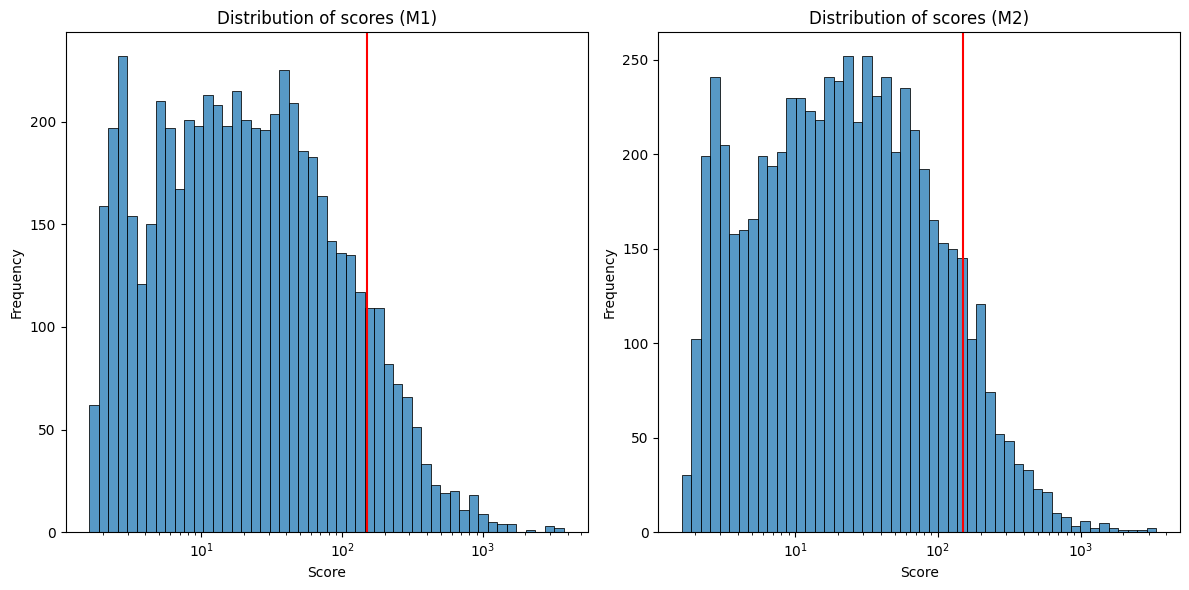

%Proteins (Score >= 150) (M1):  9.92%
%Proteins (Score >= 150) (M2):  8.90%


In [45]:
SCORE_THRESHOLD = 150

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot dataM1
sns.histplot(dataM1['Score'], bins=50, log_scale=True, ax=axs[0])
axs[0].set_title("Distribution of scores (M1)")
axs[0].set_xlabel("Score")
axs[0].set_ylabel("Frequency")
axs[0].axvline(SCORE_THRESHOLD, color='red')

# Plot dataM2
sns.histplot(dataM2['Score'], bins=50, log_scale=True, ax=axs[1])
axs[1].set_title("Distribution of scores (M2)")
axs[1].set_xlabel("Score")
axs[1].set_ylabel("Frequency")
axs[1].axvline(SCORE_THRESHOLD, color='red')

plt.tight_layout()
plt.show()


# Percentage of proteins with a score higher than the threshold
n_proteins = dataM1.shape[0]
n_proteins_above_threshold = dataM1[dataM1['Score'] >= SCORE_THRESHOLD].shape[0]
print(f"%Proteins (Score >= {SCORE_THRESHOLD}) (M1):  {n_proteins_above_threshold/n_proteins*100:.2f}%")

n_proteins = dataM2.shape[0]
n_proteins_above_threshold = dataM2[dataM2['Score'] >= SCORE_THRESHOLD].shape[0]
print(f"%Proteins (Score >= {SCORE_THRESHOLD}) (M2):  {n_proteins_above_threshold/n_proteins*100:.2f}%")


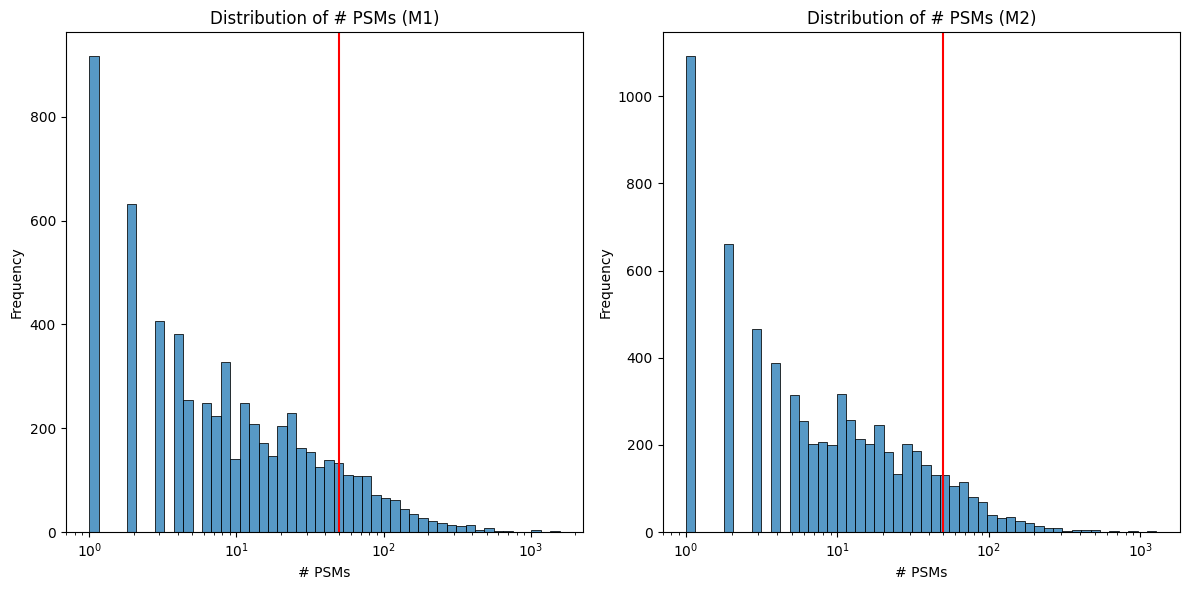

%Proteins (# PSMs >= 50) (M1):  12.72%
%Proteins (# PSMs >= 50) (M2):  10.00%


In [47]:
PMS_THRESHOLD = 50


# Plot the distribution of scores and # PSMs for both dataM1 and dataM2
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot dataM1 # PSMs
sns.histplot(dataM1['# PSMs'], bins=50, log_scale=True, ax=axs[0])
axs[0].set_title("Distribution of # PSMs (M1)")
axs[0].set_xlabel("# PSMs")
axs[0].set_ylabel("Frequency")
axs[0].axvline(PMS_THRESHOLD, color='red')

# Plot dataM2 # PSMs
sns.histplot(dataM2['# PSMs'], bins=50, log_scale=True, ax=axs[1])
axs[1].set_title("Distribution of # PSMs (M2)")
axs[1].set_xlabel("# PSMs")
axs[1].set_ylabel("Frequency")
axs[1].axvline(PMS_THRESHOLD, color='red')

plt.tight_layout()
plt.show()


# Percentage of proteins with a score higher than the threshold for both dataM1 and dataM2
n_proteins = dataM1.shape[0]
n_proteins_above_threshold = dataM1[dataM1['# PSMs'] >= PMS_THRESHOLD].shape[0]
print(f"%Proteins (# PSMs >= {PMS_THRESHOLD}) (M1):  {n_proteins_above_threshold/n_proteins*100:.2f}%")
n_proteins = dataM2.shape[0]
n_proteins_above_threshold = dataM2[dataM2['# PSMs'] >= PMS_THRESHOLD].shape[0]
print(f"%Proteins (# PSMs >= {PMS_THRESHOLD}) (M2):  {n_proteins_above_threshold/n_proteins*100:.2f}%")

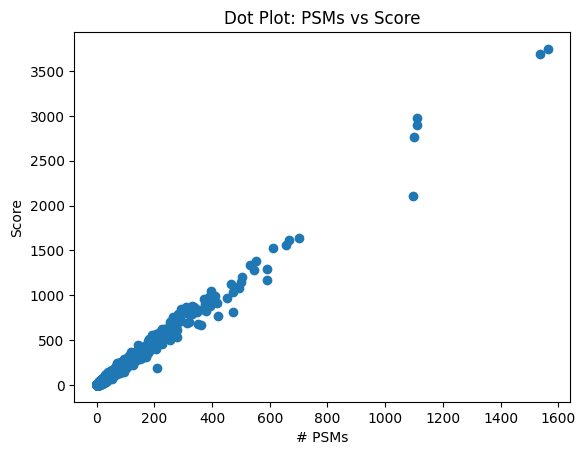

In [50]:
# Checking the correlation between # PSMs and Score
plt.scatter(dataM1['# PSMs'], dataM1['Score'])
plt.xlabel('# PSMs')
plt.ylabel('Score')
plt.title('Dot Plot: PSMs vs Score')
plt.show()

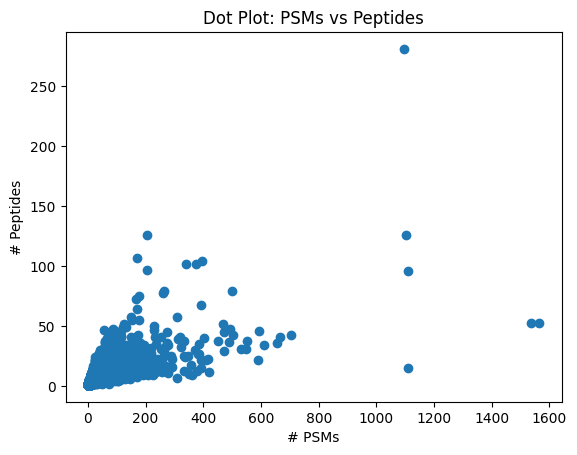

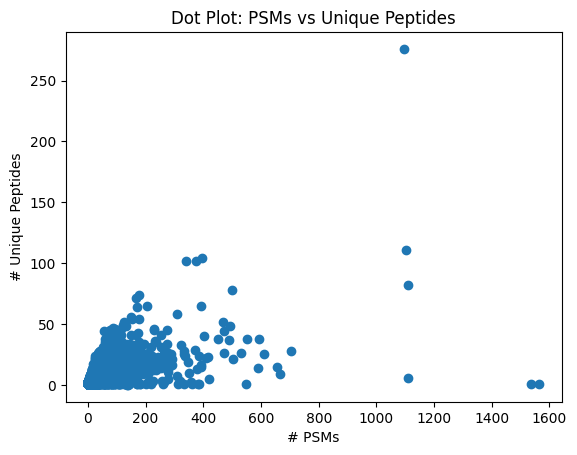

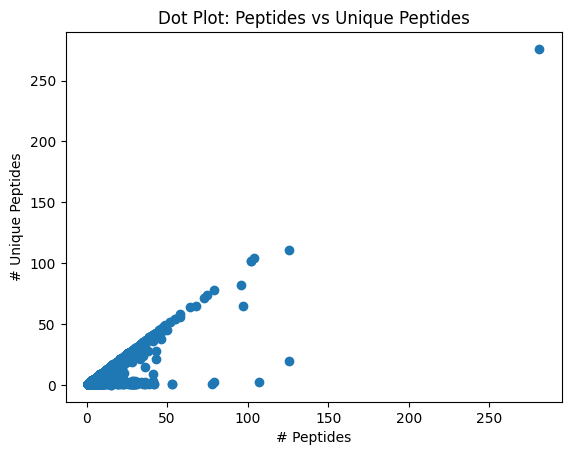

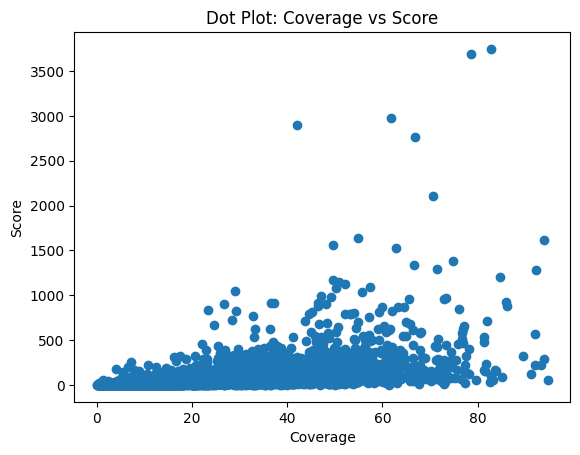

In [54]:
# Checking other correlations
plt.scatter(dataM1['# PSMs'], dataM1['# Peptides'])
plt.xlabel('# PSMs')
plt.ylabel('# Peptides')
plt.title('Dot Plot: PSMs vs Peptides')
plt.show()

plt.scatter(dataM1['# PSMs'], dataM1['# Unique Peptides'])
plt.xlabel('# PSMs')
plt.ylabel('# Unique Peptides')
plt.title('Dot Plot: PSMs vs Unique Peptides')
plt.show()

plt.scatter(dataM1['# Peptides'], dataM1['# Unique Peptides'])
plt.xlabel('# Peptides')
plt.ylabel('# Unique Peptides')
plt.title('Dot Plot: Peptides vs Unique Peptides')
plt.show()

plt.scatter(dataM1['Coverage'], dataM1['Score'])
plt.xlabel('Coverage')
plt.ylabel('Score')
plt.title('Dot Plot: Coverage vs Score')
plt.show()

### List the 100 most present proteins in both M1 and M2  *(do not work for identyfing the cell type)*
*As "present" I consider those that appear more frequent in the spectra (based on PSMs)

In [58]:
TOP_NUMBER = 100

# Take the top proteins based on the PSMs value (sorted in descending order)
topM1 = dataM1.sort_values(by='# PSMs', ascending=False).head(TOP_NUMBER)
topM2 = dataM2.sort_values(by='# PSMs', ascending=False).head(TOP_NUMBER)


Number of common proteins: 83


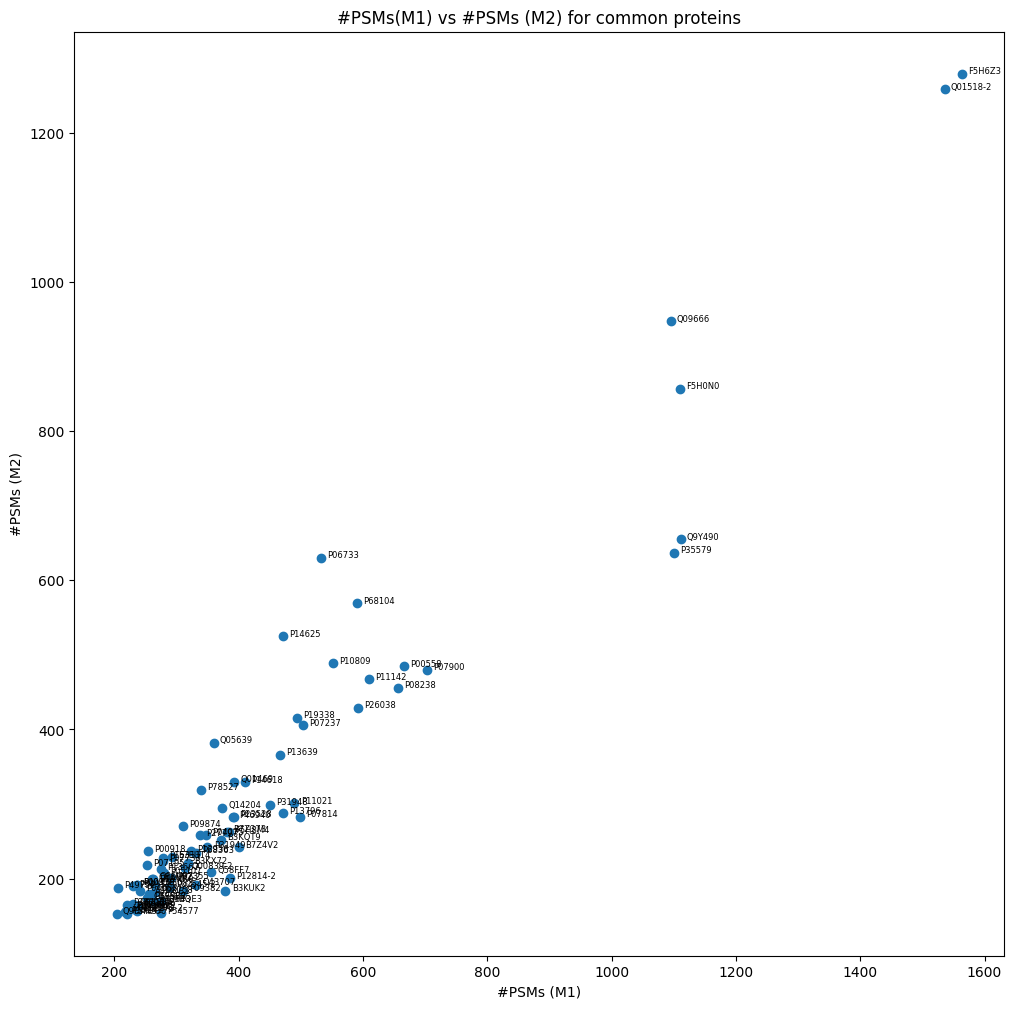

In [76]:
# Set a big size for the plot
plt.figure(figsize=(12, 12))

# Filter the proteins present in both topM1 and topM2
common_proteins = topM1.index.intersection(topM2.index)
print(f"Number of common proteins: {len(common_proteins)}")

# Create a mask to filter the common proteins
mask_common = dataM1.index.isin(common_proteins)


# Plot the dot plot of the common proteins with the # PSMs value
plt.scatter(topM1.loc[common_proteins]['# PSMs'], topM2.loc[common_proteins]['# PSMs'])
plt.xlabel('#PSMs (M1)')
plt.ylabel('#PSMs (M2)')
plt.title('#PSMs(M1) vs #PSMs (M2) for common proteins')
# Add the names of the proteins in small font
for protein in common_proteins:
    # add a separation between the dot and the text
    separation = 10
    plt.text(topM1.loc[protein]['# PSMs']+separation, topM2.loc[protein]['# PSMs'], protein, fontsize=6)

plt.show()


In [78]:
# Print a table with the first 10 proteins of common_proteins. The table must contain the Accession, Description, ScoreM1, ScoreM2, #PSMs M1, #PSMs M2, #Peptides M1, #Peptides M2, #Unique Peptides M1, #Unique Peptides M2, Coverage M1, Coverage M2
print("Table with the first 10 proteins of common_proteins")

# Create a table with the first 10 proteins of common_proteins
table = pd.DataFrame(index=common_proteins[:10])
table['Description'] = dataM1.loc[common_proteins[:10]]['Description']
table['Score M1'] = dataM1.loc[common_proteins[:10]]['Score']
table['Score M2'] = dataM2.loc[common_proteins[:10]]['Score']
table['# PSMs M1'] = dataM1.loc[common_proteins[:10]]['# PSMs']
table['# PSMs M2'] = dataM2.loc[common_proteins[:10]]['# PSMs']
table['# Peptides M1'] = dataM1.loc[common_proteins[:10]]['# Peptides']
table['# Peptides M2'] = dataM2.loc[common_proteins[:10]]['# Peptides']
table['# Unique Peptides M1'] = dataM1.loc[common_proteins[:10]]['# Unique Peptides']
table['# Unique Peptides M2'] = dataM2.loc[common_proteins[:10]]['# Unique Peptides']
table['Coverage M1'] = dataM1.loc[common_proteins[:10]]['Coverage']
table['Coverage M2'] = dataM2.loc[common_proteins[:10]]['Coverage']

print(table)



Table with the first 10 proteins of common_proteins
                                                 Description     Score M1  \
Accession                                                                   
F5H6Z3     Adenylyl cyclase-associated protein OS=Homo sa...  3747.075588   
Q01518-2   Isoform 2 of Adenylyl cyclase-associated prote...  3688.159273   
Q9Y490     Talin-1 OS=Homo sapiens GN=TLN1 PE=1 SV=3 - [T...  2894.871309   
F5H0N0     Actin, gamma 1 OS=Homo sapiens GN=ACTG1 PE=3 S...  2974.059553   
P35579     Myosin-9 OS=Homo sapiens GN=MYH9 PE=1 SV=4 - [...  2768.794294   
Q09666     Neuroblast differentiation-associated protein ...  2106.018609   
P07900     Heat shock protein HSP 90-alpha OS=Homo sapien...  1639.611819   
P00558     Phosphoglycerate kinase 1 OS=Homo sapiens GN=P...  1618.222831   
P08238     Heat shock protein HSP 90-beta OS=Homo sapiens...  1561.624144   
P11142     Heat shock cognate 71 kDa protein OS=Homo sapi...  1532.034057   

              Score M2 

### Differential Expression Analysis

---

In [87]:
# Join the dataM1 and dataM2 dataframes adding a column to identify the source of the data
dataM1['Source'] = 'M1'
dataM2['Source'] = 'M2'

# Concatenate the dataframes
data = pd.concat([dataM1, dataM2])

# Number of proteins in the concatenated dataframe
print(f"Number of proteins in the concatenated dataframe: {data.shape[0]}")

Number of proteins in the concatenated dataframe: 12909


In [90]:
# Perform a differential expression analysis without using scanpy

# Filter the proteins with a score higher than the threshold
data_filtered = data

# Number of proteins after filtering
print(f"Number of proteins after filtering: {data_filtered.shape[0]}")

# Perform a differential expression analysis
# Create a new column with the log2 fold change
data_filtered['log2FC'] = np.log2(data_filtered['# PSMs']/data_filtered['# PSMs'].mean())

# Create a new column with the p-value
data_filtered['p-value'] = 1 - data_filtered['Score']/data_filtered['Score'].max()

# Create a new column with the adjusted p-value
data_filtered['adj-p-value'] = data_filtered['p-value']

# Filter the proteins with an adjusted p-value lower than 0.05
data_filtered = data_filtered[data_filtered['adj-p-value'] < 0.05]

# Number of proteins after filtering
print(f"Number of proteins after filtering: {data_filtered.shape[0]}")

# Print the first 10 proteins
print(data_filtered.head(10))

# Perform a differential expression analysis using scanpy

# Create an AnnData object
adata = ad.AnnData(data_filtered)

# Perform a differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='Source', method='wilcoxon')

# Print the results
print(adata.uns['rank_genes_groups'])

# Perform a differential expression analysis using scanpy



Number of proteins after filtering: 12909
Number of proteins after filtering: 2
                                                 Description        Score  \
Accession                                                                   
F5H6Z3     Adenylyl cyclase-associated protein OS=Homo sa...  3747.075588   
Q01518-2   Isoform 2 of Adenylyl cyclase-associated prote...  3688.159273   

           Coverage  # Proteins  # Unique Peptides  # Peptides  # PSMs  \
Accession                                                                
F5H6Z3        82.74          11                  1          53    1564   
Q01518-2      78.69           4                  1          53    1536   

           126/126  126/126 Count  126/126 Variability [%]  ...   131/126  \
Accession                                                   ...             
F5H6Z3         1.0           27.0                      0.0  ...  1.594069   
Q01518-2       1.0            9.0                      0.0  ...  1.733901   

     

/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/anndata/utils.py:292: UserWarning: X converted to numpy array with dtype object
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


KeyError: 'Source'

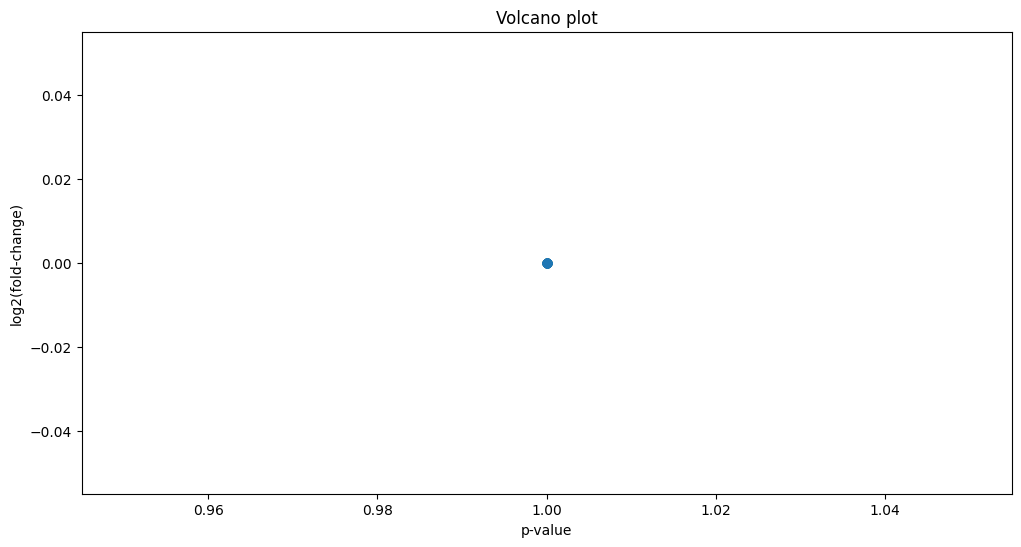

In [83]:
# Considering the TOP_NUMBER proteins in both M1 and M2, perform a differential expression analysis using the #PSMs as the feature to compare. Use the Wilcoxon test to compare the #PSMs of the proteins in M1 and M2. Plot the results in a volcano plot.
from scipy.stats import wilcoxon

# Perform the Wilcoxon test for each protein
p_values = []
for protein in common_proteins:
    p_values.append(wilcoxon(dataM1.loc[protein]['# PSMs'], dataM2.loc[protein]['# PSMs']).pvalue)

# Create a volcano plot
plt.figure(figsize=(12, 6))
plt.scatter(p_values, [0]*len(p_values), alpha=0.5)
plt.xlabel('p-value')
plt.ylabel('log2(fold-change)')
plt.title('Volcano plot')
plt.show()





              



In [79]:
# Load the data
data_src = "./data/raw/sasha_SI_THP/SI_THP_RAW_proteomics_data_ss.xlsx"
dataM1 = pd.read_excel(data_src, sheet_name="THP_M1", index_col=0)
dataM2 = pd.read_excel(data_src, sheet_name="THP_M2", index_col=0)

# Concatenate the dataM1 and dataM2 vertically
data = pd.concat([dataM1, dataM2])

# Transpose the data
data = data.T

# Create an AnnData object with the data
adata = ad.AnnData(data.astype(np.float32))

# Add the cell type information to the adata object
cell_types = ['M1'] * dataM1.shape[0] + ['M2'] * dataM2.shape[0]
adata.obs['celltype'] = cell_types

# Perform PCA analysis
sc.tl.pca(adata)

# Plot PCA
sc.pl.pca(adata, color='celltype', size=60, title='PCA by cell type')


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6187 and the array at index 1 has size 6722

---

---

In [3]:
# Load the data (Scanpy assumes that your columns are genes and your rows are cells)
data_src = "./data/spetch/proteins-processed.csv"
data = pd.read_csv(data_src, delimiter=",")

# Remove the last column
data = data.iloc[:, :-1]

# Transpose the data
data = data.T

# Keep the first row as the column names
proteins = data.iloc[0]

# Remove the first column
data = data.iloc[1:]

print(data)

# Create an AnnData object with the data
adata = ad.AnnData(data.astype(np.float32))

proteins = proteins.to_numpy()
adata.var['proteins'] = proteins

print(adata)


           0         1         2         3         4         5         6     \
i4    -0.013661  0.138751  0.548971  0.053928 -0.169109 -0.294304   -0.5013   
i5    -0.182464  0.538382 -0.224704 -0.381163  0.154295  0.611411 -0.081458   
i7     0.129773 -0.358238  0.501321  0.075328 -0.149596  -0.27469  0.189266   
i10    0.089402  -0.10123 -0.146524  0.297088  0.147458  0.117292  0.073311   
i11    0.057113 -0.106888 -0.403847 -0.030037  0.035783 -0.271956  0.440847   
...         ...       ...       ...       ...       ...       ...       ...   
i2763  0.243409  0.319634 -0.107036 -0.279031  0.042667  0.149959  -0.52892   
i2764  0.146884 -0.245888 -0.051962  0.052548 -0.078345 -0.368327   0.23883   
i2765  0.071428  0.450251 -0.015908  0.111813 -0.441047 -0.033911 -0.287062   
i2766 -0.039085  0.471335 -0.131983 -0.197843  0.033375  0.144589 -0.447393   
i2767  0.209776 -0.251196  0.864086 -0.136493 -0.083653 -0.517552  0.555461   

           7         8         9     ...      3032 

/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
# Load the anno.csv file with the cell type annotations
anno_src = "./data/spetch/cells.csv"
anno = pd.read_csv(anno_src, delimiter=",")

# Get the column names as cell IDs
cellID = anno.columns[1:]

# Transpose the data
anno = anno.T

celltypes = anno.loc[:, 0].values

# Remove the first element
celltypes = celltypes[1:]

# Create a new obs in the AnnData object with the cell type annotations 
adata.obs['cellID'] = cellID
adata.obs['celltype'] = celltypes



In [5]:
print(adata)
print("---")
print(adata.X)

AnnData object with n_obs × n_vars = 1490 × 3042
    obs: 'cellID', 'celltype'
    var: 'proteins'
---
[[-0.01366062  0.13875137  0.5489709  ...  0.04277383 -0.19088827
  -0.08314212]
 [-0.18246402  0.5383824  -0.22470355 ...  0.12382649  0.17967343
   0.43699035]
 [ 0.12977307 -0.35823777  0.5013207  ... -0.02942673  0.1776448
  -0.39915815]
 ...
 [ 0.07142757  0.45025098 -0.01590803 ... -0.08510985  0.02331777
  -0.11183907]
 [-0.03908541  0.47133476 -0.13198255 ...  0.1802387  -0.01453104
   0.02132908]
 [ 0.20977622 -0.2511958   0.8640855  ...  0.06773125  0.11957133
   0.23990701]]


---
### Convert Protein ID to Gene names

In [6]:
if TRANSLATE_PROTEIN_ID:
    # Convert proteins to gene names
    unipcl = UniprotClient()

    gene_names = unipcl.batch_translate_protein_ids(adata.var['proteins'])
    adata.var['gene_protein'] = [gene_names.get(i, i) for i in adata.var['proteins']]
    adata.var['gene'] = [i.split(' ')[0] for i in adata.var['gene_protein']]
    print(adata.var['proteins'])
    print(adata.var['gene_protein'])
    print(adata.var['gene'])


0       A0A075B6H9
1       A0A0B4J1V0
2       A0A0B4J237
3       A0A1B0GTH6
4       A0A1B0GUA6
           ...    
3037        Q9Y6R9
3038        Q9Y6U7
3039        Q9Y6W6
3040        Q9Y6X6
3041        Q9Y6Z7
Name: proteins, Length: 3042, dtype: object
0       IGLV4-69 (A0A075B6H9)
1       IGHV3-15 (A0A0B4J1V0)
2        TRAV8-2 (A0A0B4J237)
3       CSNKA2IP (A0A1B0GTH6)
4        CCDC195 (A0A1B0GUA6)
                ...          
3037          CCDC61 (Q9Y6R9)
3038          RNF215 (Q9Y6U7)
3039          DUSP10 (Q9Y6W6)
3040           MYO16 (Q9Y6X6)
3041         COLEC10 (Q9Y6Z7)
Name: gene_protein, Length: 3042, dtype: object
0       IGLV4-69
1       IGHV3-15
2        TRAV8-2
3       CSNKA2IP
4        CCDC195
          ...   
3037      CCDC61
3038      RNF215
3039      DUSP10
3040       MYO16
3041     COLEC10
Name: gene, Length: 3042, dtype: object


In [7]:
adata_back = adata.copy()

---
### PCA & UMAP



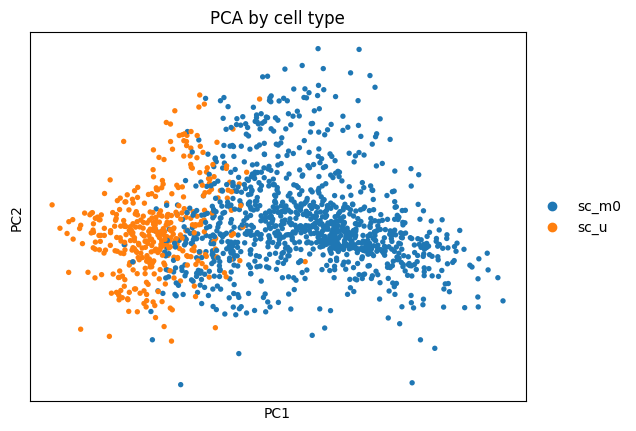

In [8]:
# PCA by cell type
sc.tl.pca(adata)
sc.pl.pca(adata, color='celltype', size=60, title='PCA by cell type')


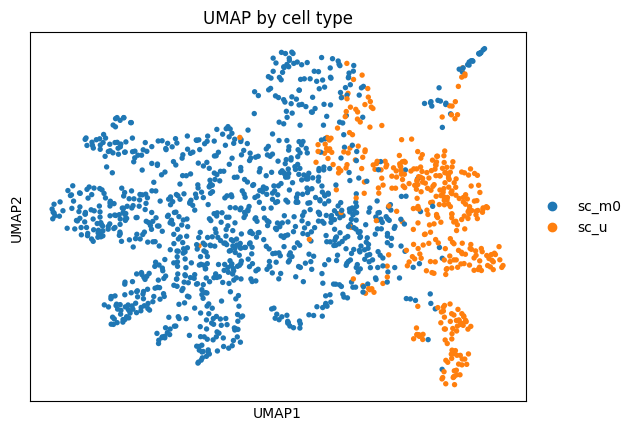

In [9]:
# UMAP by cell type
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype', size=60, title='UMAP by cell type')


---

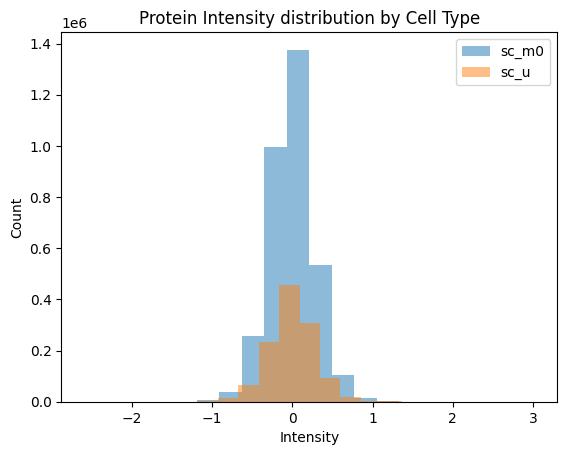

In [10]:
num_bins = 20

for celltype in adata.obs['celltype'].unique():
    plt.hist(adata[adata.obs['celltype'] == celltype].X.flatten(), bins=num_bins, alpha=0.5, label=celltype)

plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Protein Intensity distribution by Cell Type')

plt.legend()
plt.show()


/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


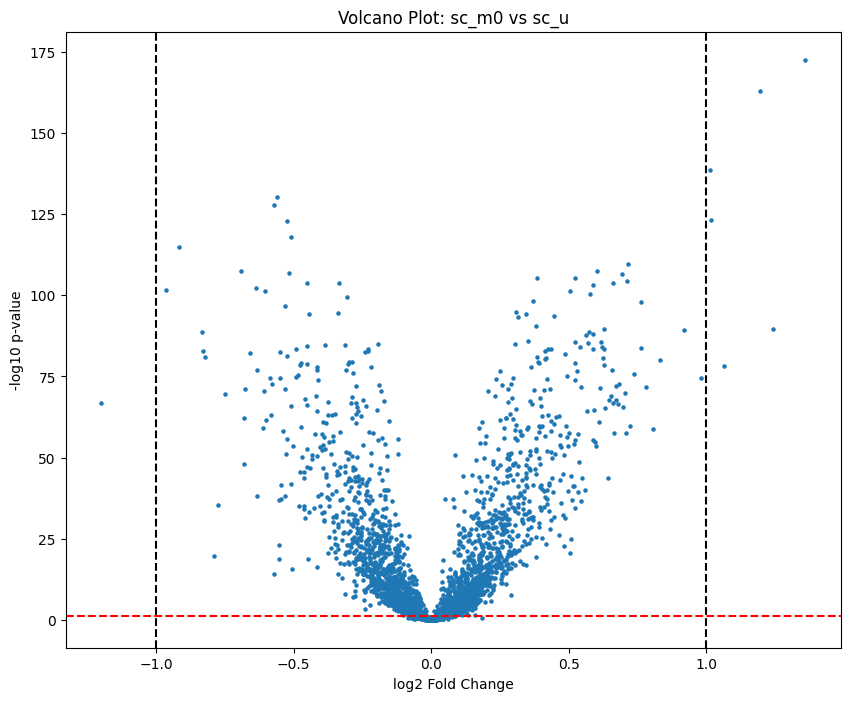

In [76]:

# Shift the matrix values so that all are positive
min_value = adata.X.min()
if min_value < 0:
    adata.X += np.abs(min_value) + 1  # Shift values to ensure they're all positive

# Filter to keep only the two groups you're interested in
group_1 = 'sc_m0'
group_2 = 'sc_u'

# Create a mask to filter the two groups
mask = adata.obs['celltype'].isin([group_1, group_2])
adata_filtered = adata[mask, :]

# Perform rank_genes_groups to find differentially expressed proteins between the two groups
sc.tl.rank_genes_groups(adata_filtered, 'celltype', groups=[group_1], reference=group_2, method='wilcoxon')

# Get log fold change and p-values
log2_fc = adata_filtered.uns['rank_genes_groups']['logfoldchanges'][group_1]  # Log2 fold changes
p_values = adata_filtered.uns['rank_genes_groups']['pvals'][group_1]          # p-values


# Convert p-values to -log10 for the volcano plot
log_p_values = -np.log10(p_values)

# Step 4: Create the volcano plot
volcano_data = pd.DataFrame({
    'log2_FC': log2_fc,
    '-log10_p_value': log_p_values
})

# Plotting the volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(volcano_data['log2_FC'], volcano_data['-log10_p_value'], s=5)

# Add vertical lines to mark fold change threshold
plt.axvline(x=1, color='black', linestyle='--')  # Fold change threshold
plt.axvline(x=-1, color='black', linestyle='--')  # Fold change threshold

# Add horizontal lines to mark significance (e.g., p-value threshold)
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')  # p-value threshold

plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 p-value')
plt.title(f'Volcano Plot: {group_1} vs {group_2}')

plt.show()


### Experiments


In [ ]:
# Assuming adata is your AnnData object containing the intensity matrix
adata.X += 10  # Add a constant to ensure non-negativity
adata.X = adata.X / adata.X.max() * 1000  # Scale to a maximum count of 1000

# Sample from Poisson distribution to simulate count data
adata.X = np.random.poisson(adata.X)

adata.X = np.log2(adata.X + 1)  # Add 1 to avoid log of zero

In [ ]:
# Differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')
sc.pl.rank_genes_groups(adata)

In [ ]:
print(result)

In [ ]:

# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
group1 = groups[0]
group2 = groups[1]

# Create DataFrame for easier handling
df = pd.DataFrame({
    'protein': result['names'][group1],
    f'logFC_{group1}': result['logfoldchanges'][group1],
    f'logFC_{group2}': result['logfoldchanges'][group2],
    f'pval_{group1}': result['pvals'][group1],
    f'pval_{group2}': result['pvals'][group2],
    f'pval_adj_{group1}': result['pvals_adj'][group1],
    f'pval_adj_{group2}': result['pvals_adj'][group2],
    f'score_{group1}': result['scores'][group1],
    f'score_{group2}': result['scores'][group2]
})

# Filter out entries with NaN log fold changes
df_filtered = df.dropna(subset=[f'logFC_{group1}', f'logFC_{group2}'])

# Print the filtered DataFrame
print(df_filtered.head())


In [ ]:

# Extract results for volcano plot
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')


plt.show()

# Clustering and dendrogram
sc.tl.dendrogram(adata, groupby='celltype')
sc.pl.dendrogram(adata, groupby='celltype')

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')
plt.show()

In [ ]:
# Differential expression analysis with optional sparse matrix conversion
#sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')
sc.tl.rank_genes_groups(adata, 'celltype', method='wilcoxon')
# to visualize the results
sc.pl.rank_genes_groups(adata)

In [ ]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')
plt.show()


In [ ]:
# Clustering
sc.tl.dendrogram(adata, groupby='celltype')

# Plot dendrogram
sc.pl.dendrogram(adata, groupby='celltype')
